In [9]:
import csv
import numpy as np
with open('MFG10YearTerminationData.csv') as myFile:
    std=list(csv.reader(myFile))
std1=np.array(std)
std1

array([['EmployeeID', 'recorddate_key', 'birthdate_key', ...,
        'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
       ['1318', '12/31/2006 0:00', '1/3/1954', ..., '2006', 'ACTIVE',
        'HEADOFFICE'],
       ['1318', '12/31/2007 0:00', '1/3/1954', ..., '2007', 'ACTIVE',
        'HEADOFFICE'],
       ...,
       ['8279', '12/1/2015 0:00', '7/18/1994', ..., '2015', 'TERMINATED',
        'STORES'],
       ['8296', '12/1/2013 0:00', '9/2/1994', ..., '2013', 'TERMINATED',
        'STORES'],
       ['8321', '12/1/2014 0:00', '11/28/1994', ..., '2014',
        'TERMINATED', 'STORES']], dtype='<U31')

In [6]:
from pyspark import SparkContext
sc=SparkContext
sqlContext=SQLContext(sc)

NameError: name 'SQLContext' is not defined

In [5]:
df = sqlContext.load('MFG10YearTermination', header = True,inferSchema = True)
df

NameError: name 'sqlContext' is not defined

In [12]:
./bin/spark-submit examples/src/main/python/pi.py

SyntaxError: invalid syntax (<ipython-input-12-a7a62006ba12>, line 1)

In [13]:
spark=SparkSession \
.builder \
.appName("Employee Attrition using classification") \
.config("spark.some.config.option","some-value") \
.getOrCreate()


NameError: name 'SparkSession' is not defined

In [1]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession \
.builder \
.appName("Employee Attrition using classification") \
.config("spark.some.config.option","some-value") \
.getOrCreate()

In [3]:
df = spark.read.load('attrition-db.csv',format='csv', header = True,inferSchema = True)
df.show()

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [4]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [22]:
df.count()

1470

### Vectorize the columns

In [5]:
assembler = VectorAssembler(
    inputCols=["Age", "EnvironmentSatisfaction", "JobSatisfaction","MonthlyIncome"],
    outputCol="features")

In [6]:
output = assembler.transform(df)
print("Assembled columns 'age', 'environmental satisfaction', 'job satisfaction', 'monthly income' to vector column 'features'")
output.select("features").show(truncate=False)



Assembled columns 'age', 'environmental satisfaction', 'job satisfaction', 'monthly income' to vector column 'features'
+----------------------+
|features              |
+----------------------+
|[41.0,2.0,4.0,5993.0] |
|[49.0,3.0,2.0,5130.0] |
|[37.0,4.0,3.0,2090.0] |
|[33.0,4.0,3.0,2909.0] |
|[27.0,1.0,2.0,3468.0] |
|[32.0,4.0,4.0,3068.0] |
|[59.0,3.0,1.0,2670.0] |
|[30.0,4.0,3.0,2693.0] |
|[38.0,4.0,3.0,9526.0] |
|[36.0,3.0,3.0,5237.0] |
|[35.0,1.0,2.0,2426.0] |
|[29.0,4.0,3.0,4193.0] |
|[31.0,1.0,3.0,2911.0] |
|[34.0,2.0,4.0,2661.0] |
|[28.0,3.0,3.0,2028.0] |
|[29.0,2.0,1.0,9980.0] |
|[32.0,1.0,2.0,3298.0] |
|[22.0,4.0,4.0,2935.0] |
|[53.0,1.0,4.0,15427.0]|
|[38.0,4.0,4.0,3944.0] |
+----------------------+
only showing top 20 rows



In [7]:
from pyspark.ml.feature import VectorIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### Index labels, adding metadata to the label column
### Fit on whole dataset to include all labels in index

In [8]:
labelIndexer = StringIndexer(inputCol="Attrition", outputCol="indexedAttrition").fit(output)

### Automatically identify categorical features, and index them
### Set maxCategories so features with > 4 distinct values are treated as continuous

In [9]:
featureIndexer= VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(output)

### Train a RandomForest model

In [10]:
rf = RandomForestClassifier(labelCol="indexedAttrition", featuresCol="indexedFeatures", numTrees=10)



### Split the data into training and test sets (30% held out for testing)

In [11]:
(trainingData, testData) = output.randomSplit([0.7, 0.3])

### Convert indexed labels back to original labels

In [12]:

labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                                   labels=labelIndexer.labels)

### Chain indexers and forest in a Pipeline

In [13]:

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

### Train model

In [14]:
model = pipeline.fit(trainingData)

### Make predictions

In [15]:
predictions = model.transform(testData)

### Select example rows to display

In [16]:

predictions.select("predictedLabel", "Attrition", "features").show(5)

+--------------+---------+--------------------+
|predictedLabel|Attrition|            features|
+--------------+---------+--------------------+
|           Yes|      Yes|[18.0,3.0,3.0,142...|
|            No|       No|[19.0,2.0,4.0,299...|
|            No|      Yes|[19.0,1.0,2.0,185...|
|            No|      Yes|[19.0,4.0,2.0,212...|
|            No|       No|[20.0,4.0,1.0,272...|
+--------------+---------+--------------------+
only showing top 5 rows



### Select (prediction, true label) and compute test error

In [17]:

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedAttrition", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))

Test Error = 0.167431
Accuracy = 0.832569


In [18]:
tp = predictions[(predictions.Attrition == 'Yes') & (predictions.predictedLabel == 'Yes')].count()
tn = predictions[(predictions.Attrition == 'No') & (predictions.predictedLabel == 'No')].count()
fp = predictions[(predictions.Attrition == 'No') & (predictions.predictedLabel == 'Yes')].count()
fn = predictions[(predictions.Attrition == 'Yes') & (predictions.predictedLabel == 'No')].count()
print ("True Positives:", tp)
print ("True Negatives:", tn)
print ("False Positives:", fp)
print ("False Negatives:", fn)
print ("Total", predictions.count())

True Positives: 2
True Negatives: 361
False Positives: 0
False Negatives: 73
Total 436


In [69]:
predictions

DataFrame[Age: int, Attrition: string, BusinessTravel: string, DailyRate: int, Department: string, DistanceFromHome: int, Education: int, EducationField: string, EmployeeCount: int, EmployeeNumber: int, EnvironmentSatisfaction: int, Gender: string, HourlyRate: int, JobInvolvement: int, JobLevel: int, JobRole: string, JobSatisfaction: int, MaritalStatus: string, MonthlyIncome: int, MonthlyRate: int, NumCompaniesWorked: int, Over18: string, OverTime: string, PercentSalaryHike: int, PerformanceRating: int, RelationshipSatisfaction: int, StandardHours: int, StockOptionLevel: int, TotalWorkingYears: int, TrainingTimesLastYear: int, WorkLifeBalance: int, YearsAtCompany: int, YearsInCurrentRole: int, YearsSinceLastPromotion: int, YearsWithCurrManager: int, features: vector, indexedAttrition: double, indexedFeatures: vector, rawPrediction: vector, probability: vector, prediction: double, predictedLabel: string]

In [70]:
predictions.show()

+---+---------+-----------------+---------+--------------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+----------+--------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHi

In [71]:
predictions.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [72]:
panda_predictions = predictions.toPandas()

In [73]:
panda_predictions

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,features,indexedAttrition,indexedFeatures,rawPrediction,probability,prediction,predictedLabel
0,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,0,0,0,"[18.0, 2.0, 4.0, 1051.0]",0.0,"[18.0, 1.0, 3.0, 1051.0]","[2.778754578754579, 7.221245421245421]","[0.2778754578754579, 0.7221245421245421]",1.0,Yes
1,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,0,0,0,"[18.0, 2.0, 2.0, 1878.0]",1.0,"[18.0, 1.0, 1.0, 1878.0]","[4.65970695970696, 5.340293040293041]","[0.465970695970696, 0.534029304029304]",1.0,Yes
2,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,0,0,0,"[18.0, 3.0, 3.0, 1420.0]",1.0,"[18.0, 2.0, 2.0, 1420.0]","[1.385714285714286, 8.614285714285714]","[0.1385714285714286, 0.8614285714285714]",1.0,Yes
3,19,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,...,0,0,0,"[19.0, 2.0, 2.0, 1483.0]",0.0,"[19.0, 1.0, 1.0, 1483.0]","[4.65970695970696, 5.340293040293041]","[0.465970695970696, 0.534029304029304]",1.0,Yes
4,19,Yes,Non-Travel,504,Research & Development,10,3,Medical,1,1248,...,1,0,0,"[19.0, 1.0, 2.0, 1859.0]",1.0,"[19.0, 0.0, 1.0, 1859.0]","[3.9605351170568563, 6.039464882943144]","[0.39605351170568565, 0.6039464882943144]",1.0,Yes
5,19,Yes,Travel_Rarely,419,Sales,21,3,Other,1,959,...,0,0,0,"[19.0, 4.0, 2.0, 2121.0]",1.0,"[19.0, 3.0, 1.0, 2121.0]","[6.640476190476191, 3.359523809523809]","[0.6640476190476191, 0.3359523809523809]",0.0,No
6,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,566,...,0,0,0,"[19.0, 1.0, 4.0, 2564.0]",1.0,"[19.0, 0.0, 3.0, 2564.0]","[6.089751515889623, 3.910248484110377]","[0.6089751515889623, 0.3910248484110377]",0.0,No
7,20,No,Travel_Rarely,805,Research & Development,3,3,Life Sciences,1,1198,...,2,1,2,"[20.0, 1.0, 3.0, 3033.0]",0.0,"[20.0, 0.0, 2.0, 3033.0]","[4.791768980889707, 5.208231019110294]","[0.4791768980889707, 0.5208231019110294]",1.0,Yes
8,20,Yes,Travel_Frequently,871,Research & Development,6,3,Life Sciences,1,137,...,0,1,0,"[20.0, 4.0, 4.0, 2926.0]",1.0,"[20.0, 3.0, 3.0, 2926.0]","[8.11300494563576, 1.8869950543642404]","[0.811300494563576, 0.18869950543642405]",0.0,No
9,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,0,0,0,"[21.0, 3.0, 4.0, 1232.0]",0.0,"[21.0, 2.0, 3.0, 1232.0]","[2.1095238095238096, 7.89047619047619]","[0.21095238095238095, 0.789047619047619]",1.0,Yes


In [74]:
import matplotlib.pyplot as plt

In [75]:
%matplotlib inline

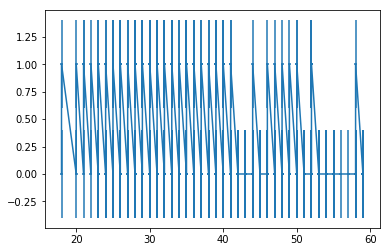

In [30]:
x = panda_predictions['Age']
y = panda_predictions['indexedAttrition']
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

In [32]:
import pandas as pd

In [33]:
d=pd.DataFrame({'Age':x,'Attrition':y})


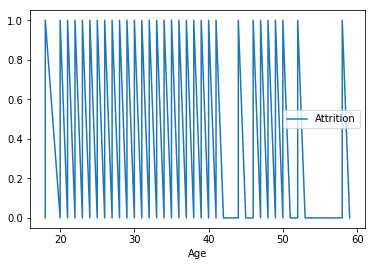

In [34]:
d.plot.line(x='Age',y='Attrition')

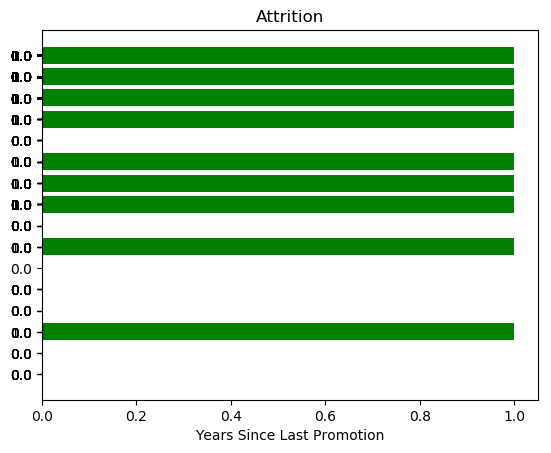

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x=panda_predictions['YearsSinceLastPromotion']
y=panda_predictions['indexedAttrition']
ax.barh(x, y, align='center',
        color='green', ecolor='black')
ax.set_yticks(x)
ax.set_yticklabels(y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Years Since Last Promotion')
ax.set_title('Attrition')

plt.show()

In [80]:
x

0       5
1       5
2       3
3       3
4      10
5      21
6       2
7       3
8       6
9      15
10     22
11      1
12      7
13     10
14     26
15     16
16     15
17      1
18      4
19      8
20      4
21     20
22      4
23     10
24      9
25      7
26      8
27      4
28     24
29     10
       ..
431     6
432     2
433     3
434     7
435     2
436    20
437     7
438     1
439     2
440     3
441    17
442    18
443     2
444     2
445     2
446    18
447     1
448    22
449     9
450     8
451    23
452    11
453    24
454     1
455     2
456     1
457     2
458     6
459     3
460    28
Name: DistanceFromHome, Length: 461, dtype: int32

In [38]:
import numpy as np

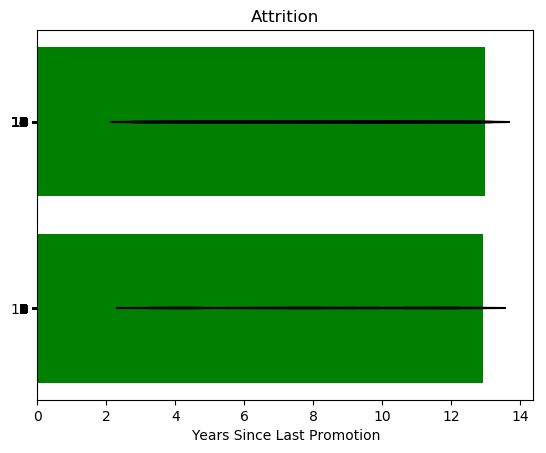

In [41]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
#y_pos = np.arange(len(panda_predictions['YearsSinceLastPromotion']))
performance = 3 + 10 * np.random.rand(len(panda_predictions['YearsSinceLastPromotion']))
error = np.random.rand(len(panda_predictions['YearsSinceLastPromotion']))

ax.barh(panda_predictions['indexedAttrition'], performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(panda_predictions['indexedAttrition'])
ax.set_yticklabels(panda_predictions['YearsSinceLastPromotion'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Years Since Last Promotion')
ax.set_title('Attrition')

plt.show()

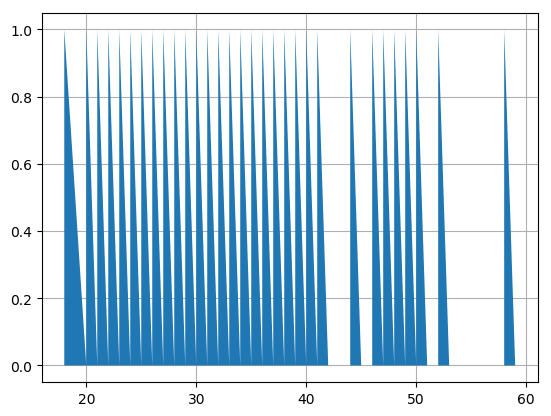

In [48]:
x = panda_predictions['Age']
y = panda_predictions['indexedAttrition']
fig, ax = plt.subplots()
ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

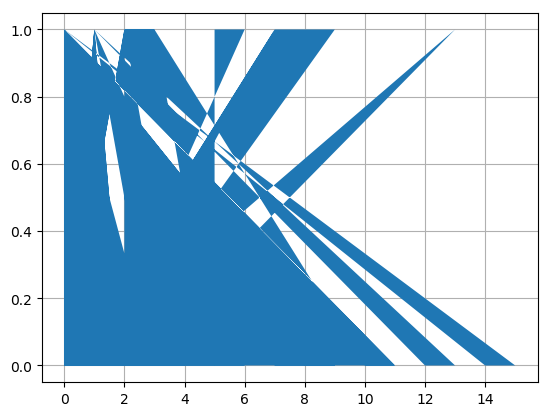

In [50]:
x = panda_predictions['YearsSinceLastPromotion']
y = panda_predictions['indexedAttrition']
fig, ax = plt.subplots()
ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

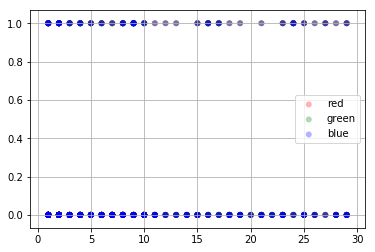

In [78]:
from numpy.random import rand
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    x=panda_predictions['DistanceFromHome']
    y=panda_predictions['indexedAttrition']
    ax.scatter(x, y, c=color,label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0C1CB350>,
      dtype=object)

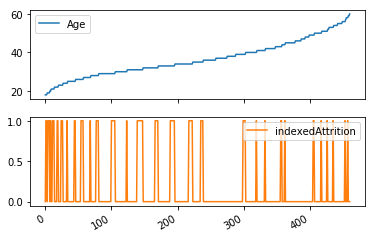

In [82]:
panda_predictions[['Age','indexedAttrition']].plot(subplots=True)

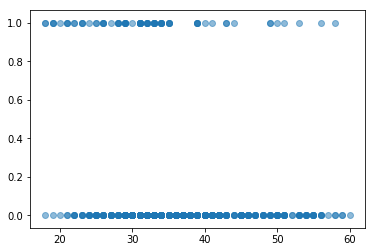

In [84]:
x = panda_predictions['Age']
y = panda_predictions['indexedAttrition']
plt.scatter(x, y, alpha=0.5)
plt.show()